# Task 1: Single-particle basis

We will here discuss how to set up the single-particle basis for the Hamiltonian used by {cite:t}`zanghellini_2004`. We will use a one-dimensional discrete-variable representation (DVR) for our single-particle states. Specifically we will use the sinc-DVR basis by {cite:t}`colbert-sinc`.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Hamiltonian

The Hamiltonian used by {cite:t}`zanghellini_2004` is

$$
    \hat{H}(x_1, \dots, x_N, t) = \sum_{i = 1}^{N} \left(
        -\frac{1}{2} \frac{\mathrm{d}^2}{\mathrm{d}x_i^2}
        + \frac{\Omega^2}{2} \hat{x}_i^2
        + \hat{x}_i \mathcal{E}_0 \sin(\omega t)
    \right)
    + \sum_{i = 1}^{N} \sum_{j = i + 1}^{N}
    \frac{1}{\sqrt{(\hat{x}_i - \hat{x}_j)^2 + a^2}},
$$ (eq:hamiltonian)

where we denote the time-independent one-body Hamiltonian by

$$
    \hat{h}(x_i) = -\frac{1}{2} \frac{\mathrm{d}^2}{\mathrm{d}x_i^2}
    + \frac{\Omega^2}{2} \hat{x}_i^2
    \equiv \hat{t} + \hat{v}(x).
$$ (eq:one-body-hamiltonian)

Here $\hat{t}$ is the kinetic energy operator, and $\hat{v}(x)$ the harmonic oscillator potential energy operator.
The two-body soft Coulomb interaction is denoted
\begin{align*}
    \hat{u}(x_i, x_j) = \frac{1}{\sqrt{(\hat{x}_i - \hat{x}_j)^2 + a^2}},
\end{align*}
and the semi-classical monochromatic laser-field described by a  time-dependent, one-body, dipole interaction as
\begin{align*}
    \hat{h}_I(x_i, t)
    = \hat{x}_i \mathcal{E}_0 \sin(\omega t).
\end{align*}
As done by {cite:t}`zanghellini_2004` we will restrict ourselves to two-particles, i.e., $N = 2$, we use a trap frequency of $\Omega = 0.25$, and a "shielding" parameter $a = 0.25$ for the Coulomb interaction. For the laser field we use a field strength of $\mathcal{E}_0 = 1$ and a laser frequency of $\omega = 8 \Omega$.

## Definition of a one-dimensional DVR basis

According to {cite:t}`colbert-dvr` a definition of a one-dimensional DVR consists of four components.
They are:

1. An orthonormal basis set $B = \{\chi_{\alpha}(x) \mid \alpha = 1, \dots, K\}$, where $\chi_{\alpha}(x)$ are real.
2. An $N$-point quadrature with the _points_ and _weights_ $Q = \{(x_{\alpha}, w_{\alpha}) \mid \alpha = 1, \dots K\}$.
3. The property $\chi_{\alpha}(x_{\beta}) = w_{\beta}^{-1/2} \delta_{\alpha \beta}$ where $(x_{\beta}, w_{\beta}) \in Q$ and $\chi_{\alpha}(x) \in B$.
4. The rule that the matrix elements of all multiplicative operators (all $\hat{x}$-dependent operators) are computed within the quadrature approximation.

{cite:t}`colbert-dvr` dub $\chi_{\alpha}(x)$ the DVR functions.
Note that even though $\chi_{\alpha}(x_{\beta}) = w_{\beta}^{-1/2} \delta_{\alpha \beta}$ when $(x_{\beta},
w_{\beta}) \in Q$, $\chi_{\alpha}(x)$  is not necessarily zero for all values of $x$. We will see an example of this below.
That is, the basis functions does not have to be everywhere zero except for
at the quadrature points.
They are however orthogonal at the quadrature points as stated by property
3 above.
Property 4 is given mathematically as
\begin{align*}
    \langle \chi_{\alpha} | \hat{v}(x) | \chi_{\beta} \rangle
    \approx \sum_{\gamma = 1}^{K} w_{\gamma} \chi_{\alpha}(x_{\gamma}) v(x_{\gamma}) \chi_{\beta}(x_{\gamma})
    = \sum_{k = \gamma}^{K} \frac{w_{\gamma}}{\sqrt{w_{\alpha} w_{\beta}}} \delta_{\alpha \gamma} \delta_{\beta \gamma} v(x_{\gamma})
    = \delta_{\alpha \beta} v(x_{\beta}),
\end{align*}
that is, the matrix elements of the potential operator (with only $\hat{x}$-dependent operators) is the potential evaluated at the quadrature points, and it is diagonal.

## Sinc-DVR basis

The specific DVR-basis we will be using is the sinc-DVR by {cite:t}`colbert-sinc`. The basis set is then $B = \{\chi_{\alpha}(x) \mid \alpha = 1, \dots, K\}$ with the basis functions defined as
\begin{align*}
    \chi_{\alpha}(x) = \frac{1}{\sqrt{\delta x}} \mathrm{sinc}\!\left(
    \frac{x - x_{\alpha}}{\delta x}
    \right),
\end{align*}
where the $\mathrm{sinc}(x)$-function is given by
\begin{align*}
    \mathrm{sinc}(x) = \begin{cases}
        \frac{\sin(\pi x)}{\pi x}, & x \neq 0, \\
        \quad 1, & x = 0.
    \end{cases}
\end{align*}
The quadrature for this basis is $Q = \{(x_0 + \alpha\delta x, \delta x) \mid \alpha = 1, \dots, K\}$, that is, a uniform grid  with equal weights, $x_{\alpha} = x_0 + \alpha \delta x$ with $x_0$ an arbitrary starting point, and all weights the same $\delta x$.

In [4]:
# Class defining a sinc-DVR single-particle function
class SincDVR:
    def __init__(self, x_a, dx):
        self.x_a = x_a
        self.dx = dx

    def __call__(self, x):
        return np.sinc((x - self.x_a) / self.dx) / np.sqrt(self.dx)

In [5]:
dx = 0.2  # Grid-spacing
x_min = -5  # Left-most side of the simulation box
x_max = 5
num_dvr = int((x_max - x_min) / dx) + 1  # Number of DVR-states

grid = np.linspace(x_min, x_max, num_dvr)  # The uniform quadrature grid
B = [SincDVR(x_a, dx) for x_a in grid]  # List of callable sinc-DVR functions

Below we demonstrate what the sinc-DVR functions look like, both on the grid (where they are Kronecker-Deltas) and on a more refined grid.

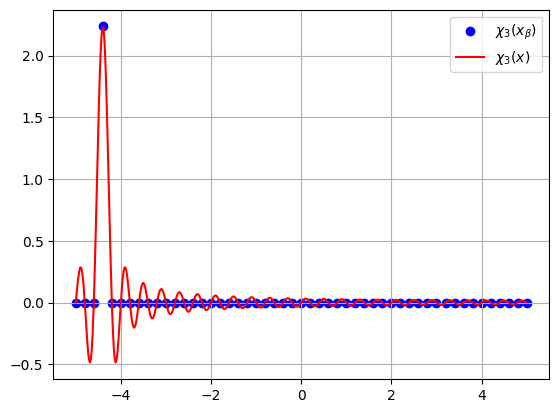

In [12]:
plt.scatter(grid, B[3](grid), color="b", label=r"$\chi_3(x_\beta)$")
plt.plot(
    (x := np.linspace(x_min, x_max, num_dvr * 10)),
    B[3](x),
    color="r",
    label=r"$\chi_3(x)$",
)
plt.grid()
plt.legend()
plt.show()

Here $\chi_3(x)$ is the sinc-DVR function on a more refined grid, and $\chi_3(x_{\beta})$ denotes the same function evaluated only at the grid points. We see that $\chi_3(x_{\beta})$ is $(\delta x)^{-1/2}$ at $x_3$, and zero at all the other quadrature points. The more refined function $\chi_3(x)$ oscillates between the quadrature points, but is exactly zero at $x = x_{\beta}$ when $\beta \neq 3$, and $(\delta x)^{-1/2}$ when $x = x_3$.

### Matrix elements of the Hamiltonian

We will be needing both one-body and two-body matrix elements from the Hamiltonian shown in equation {eq}`eq:hamiltonian`. The kinetic energy matrix elements for the sinc-DVR can be found in equation (A7) in Ref. {cite}`colbert-sinc`. They are
\begin{align*}
    t_{\alpha \beta}
    \equiv
    \langle \chi_{\alpha} | \hat{t} | \chi_{\beta} \rangle
    = \begin{cases}
        \frac{\pi^2}{6 (\delta x)^2}, & \alpha = \beta, \\
        \frac{(-1)^{\alpha - \beta}}{(\delta x)^2 (\alpha - \beta)^2}, & \alpha \neq \beta,
    \end{cases}
\end{align*}
where $\hat{t} = -\frac{1}{2} \frac{\mathrm{d}^2}{\mathrm{d} x^2}$ is the kinetic energy operator.
The remaining terms can be evaluated using the quadrature rule. For example, the matrix elements of the harmonic oscillator potential (or only the operator part) are
\begin{align*}
    \langle \chi_{\alpha} | \hat{x}^2 | \chi_{\beta} \rangle
    \approx \delta_{\alpha \beta} x_{\beta}^2.
\end{align*}
For the two-body Coulomb interaction there are two integrals which can both be solved using the quadrature rule.
That is (note which position in the bras and the kets are pairwise integrated),

$$
    \langle \chi_{\alpha} \chi_{\beta} | \hat{u}(x_1, x_2) | \chi_{\gamma} \chi_{\delta} \rangle
    = \int \mathrm{d} x \mathrm{d} y \frac{\chi_{\alpha}(x) \chi_{\beta}(y) \chi_{\gamma}(x) \chi_{\delta}(y)}{\sqrt{(x - y)^2 + a^2}}
    \approx \delta_{\alpha \gamma} \delta_{\beta \delta} u(x_{\gamma}, x_{\delta}).
$$ (eq:task-1-quadrature-two-body)

```{admonition} Problem a)
Show how the quadrature rule can be used twice to get the expression in equation {eq}`eq:task-1-quadrature-two-body`.
```

```{admonition} Problem b)
Set up the matrix elements needed for the Hamiltonian in equation {eq}`eq:hamiltonian`.
```

```{admonition} Tip
:class: tip
Once you have set up the matrix elements of the one-body Hamiltonian from equation {eq}`eq:one-body-hamiltonian` you can check that the setup has been done correctly. The eigenvalues of the one-body Hamiltonian should correspond to the eigenvalues of a one-dimensional harmonic oscillator (see {cite}`griffiths2010introduction` chapter 2.3) (if they differ by much you might need to increase the number of basis functions, and it might be that only the lowest eigenvalues are correct).
```